# Brushes, brooms, mops and buckets
## ___Some tools for delimited file messes___

<img src='images/brushes_etc.jpg' width="60%" align="left"/>

-------

# Purpose of this talk

- Common problems
- Demonstrate some cleaning tools
- End goal: get data ready for analysis



- Keep it interactive - please chime in if you also have tools to share
- Time set aside at the end for questions too


## Agenda

1. Terminal / shell commands
2. CSVKit
3. Reading data into Pandas
4. Missing data
5. Initial exploratory data analysis
______

# My background

Background in mathematics, computer science and economics

Over the past ten years I've worked for

<img src="images/abcap.jpg" width = "20%" align="left"/>

<img src="images/sars.jpg" width = 200 align="left"/>

<img src="images/bo.jpg" width = 200 align="left"/>


------

# Delimited Text Files 

## Can't live with them, can't live without them



## What are they?
Text representation of two-dimensional data
- Each line represents a record 
- Fixed number of fields
- Fields separated by delimiter character
- Lines terminated by line-end character (```\r\n``` or ```\n```)
- Quote character
- Escape character (or escape sequence)
- Field names in first record (usually)

## Benefits
- Practical
- Easy
- Familiar to business users, database admins
- Supported widely
- Portable

(95% of the data for initial analysis comes in some kind of delimited flat file)

## Challenges
- No standard definition
- No metadata
- Representing numeric types in strings is not ideal
- Many different approaches to escaping
- Character encoding
- *.csv* extension used most of the time
______

## What challenges have you experienced with delimited files?


## Brushes: command line tools for text processing

<img src="images/brushes.jpg" width = "30%" align = "left"/>

### NYPD Motor Vehicle Collisions Dataset

>This is a breakdown of every collision in NYC by location and injury. This data is collected because the NYC Council passed Local Law #11 in 2011. This data is manually run every month and reviewed by the TrafficStat Unit before being posted on the NYPD website. Each record represents a collision in NYC by city, borough, precinct and cross street.

### Getting a first look at the file with ```head``` and ```tail```

In [1]:
!du -h data/NYPD_Motor_Vehicle_Collisions.csv

263M	data/NYPD_Motor_Vehicle_Collisions.csv


In [2]:
!head data/NYPD_Motor_Vehicle_Collisions.csv

DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
04/06/2018,0:00,BRONX,10459,40.832726,-73.89655,"(40.832726, -73.89655)",,,1423      PROSPECT AVENUE               ,0,0,0,0,0,0,0,0,Unspecified,,,,,3876199,SPORT UTILITY / STATION WAGON,,,,
04/06/2018,0:00,MANHATTAN,10030,40.818832,-73.942276,"(40.818832, -73.942276)",,,222       WEST 140 STREET               ,0,0,0,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,,,,3876938,PASSENGER VEHICLE,SPORT UTILITY / STATI

In [3]:
!tail -n 2 data/NYPD_Motor_Vehicle_Collisions.csv

07/01/2012,9:57,MANHATTAN,10065,40.7652424,-73.9578679,"(40.7652424, -73.9578679)",1 AVENUE                        ,EAST 68 STREET                  ,,0,0,0,0,0,0,0,0,Other Vehicular,Other Vehicular,,,,44907,PASSENGER VEHICLE,TAXI,,,
07/01/2012,9:59,BRONX,10452,40.835397,-73.920305,"(40.835397, -73.920305)",EAST 167 STREET                 ,GERARD AVENUE                   ,,0,0,0,0,0,0,0,0,Glare,Unspecified,,,,85154,PASSENGER VEHICLE,SPORT UTILITY / STATION WAGON,,,


In [4]:
!head -n 1 data/NYPD_Motor_Vehicle_Collisions.csv

DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5


### Counting words and lines with ```wc```

In [5]:
!wc -l data/NYPD_Motor_Vehicle_Collisions.csv

 1240443 data/NYPD_Motor_Vehicle_Collisions.csv


In [6]:
!wc -w data/NYPD_Motor_Vehicle_Collisions.csv

 11826363 data/NYPD_Motor_Vehicle_Collisions.csv


### Finding text with ```grep```

In [7]:
!grep -i "35th ave" data/NYPD_Motor_Vehicle_Collisions.csv

08/28/2017,23:45,QUEENS,11106,,,,35th Ave                        ,11 street,,1,0,0,0,0,0,1,0,Driver Inexperience,Unspecified,Unspecified,,,3739672,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,SPORT UTILITY / STATION WAGON,,
04/05/2016,14:30,QUEENS,11101,40.75495,-73.921744,"(40.75495, -73.921744)",                                ,                                ,40-46 35TH AVE                          ,0,0,0,0,0,0,0,0,Driver Inattention/Distraction,Driver Inattention/Distraction,,,,3428956,PASSENGER VEHICLE,PASSENGER VEHICLE,,,


## Redirection and pipes

### Output redirection

In [8]:
!tail -n 2 data/NYPD_Motor_Vehicle_Collisions.csv > data/tail.csv

In [9]:
!head -n 2 data/NYPD_Motor_Vehicle_Collisions.csv > data/head.csv

In [10]:
!tail -n 2 data/NYPD_Motor_Vehicle_Collisions.csv >> data/head.csv

### Pipes

In [11]:
!head -n 100 data/NYPD_Motor_Vehicle_Collisions.csv | wc -l

     100


### Manipulating files with ```sed``` and ```awk```

In [12]:
!sed 's$,$|$g' data/head.csv 

DATE|TIME|BOROUGH|ZIP CODE|LATITUDE|LONGITUDE|LOCATION|ON STREET NAME|CROSS STREET NAME|OFF STREET NAME|NUMBER OF PERSONS INJURED|NUMBER OF PERSONS KILLED|NUMBER OF PEDESTRIANS INJURED|NUMBER OF PEDESTRIANS KILLED|NUMBER OF CYCLIST INJURED|NUMBER OF CYCLIST KILLED|NUMBER OF MOTORIST INJURED|NUMBER OF MOTORIST KILLED|CONTRIBUTING FACTOR VEHICLE 1|CONTRIBUTING FACTOR VEHICLE 2|CONTRIBUTING FACTOR VEHICLE 3|CONTRIBUTING FACTOR VEHICLE 4|CONTRIBUTING FACTOR VEHICLE 5|UNIQUE KEY|VEHICLE TYPE CODE 1|VEHICLE TYPE CODE 2|VEHICLE TYPE CODE 3|VEHICLE TYPE CODE 4|VEHICLE TYPE CODE 5
04/06/2018|0:00|BRONX|10459|40.832726|-73.89655|"(40.832726| -73.89655)"|||1423      PROSPECT AVENUE               |0|0|0|0|0|0|0|0|Unspecified|||||3876199|SPORT UTILITY / STATION WAGON||||
07/01/2012|9:57|MANHATTAN|10065|40.7652424|-73.9578679|"(40.7652424| -73.9578679)"|1 AVENUE                        |EAST 68 STREET                  ||0|0|0|0|0|0|0|0|Other Vehicular|Other Vehicular||||44907|PASSENGER VEHICLE|TAXI||

### Using regular expressions 
<img src="images/regex.jpg" width = '69%' align='left'/>

In [13]:
!grep -Eo '([0-9][0-9][.][0-9]+)' data/head.csv

40.832726
73.89655
40.832726
73.89655
40.7652424
73.9578679
40.7652424
73.9578679
40.835397
73.920305
40.835397
73.920305


In [14]:
!sed -E \
's/\(([0-9][0-9][.][0-9]+)[,]([ ]*-[0-9][0-9][.][0-9]+)\)/\1:\2/g' \
data/head.csv 

DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
04/06/2018,0:00,BRONX,10459,40.832726,-73.89655,"40.832726: -73.89655",,,1423      PROSPECT AVENUE               ,0,0,0,0,0,0,0,0,Unspecified,,,,,3876199,SPORT UTILITY / STATION WAGON,,,,
07/01/2012,9:57,MANHATTAN,10065,40.7652424,-73.9578679,"40.7652424: -73.9578679",1 AVENUE                        ,EAST 68 STREET                  ,,0,0,0,0,0,0,0,0,Other Vehicular,Other Vehicular,,,,44907,PASSENGER VEHICLE,TAXI,,,
07

## Character encoding and how Bush hid the facts

- Characters are stored as strings of bits
- Character encodings define mapping

<img src='images/text-into-binary.gif' align='left' width='50%'/>

### Some German text

Read in some text from _Die Fürstin, by Kasimir Edschmid_ from the Gutenberg Project

In [15]:
import sys
from io import open

In [16]:
with open('data/die_ISO-8859-1.txt','r') as f:
    print(f.readline())

UnicodeDecodeError: 'utf8' codec can't decode byte 0xfc in position 36: invalid start byte

Not encoded using __utf8__!

What encoding is being used?

### Determining character encoding (*chardetect*)

In [17]:
!chardetect data/die_ISO-8859-1.txt

data/die_ISO-8859-1.txt: ISO-8859-1 with confidence 0.676368597817


In [18]:
with open('data/die_ISO-8859-1.txt','r', encoding='ISO-8859-1') as f:
    print(f.readline())

The Project Gutenberg EBook of Die Fürstin, by Kasimir Edschmid



### Converting between character encodings (*iconv*)

```iconv``` converts between file encodings

Does iconv supports ```ISO-8859-1```?

In [19]:
!iconv -l | grep -io ISO-8859-1 | head -n 1

ISO-8859-1


It does - let's do the conversion

In [20]:
!iconv -f 'ISO-8859-1' -t 'utf-8' data/die_ISO-8859-1.txt \
> data/die_utf-8.txt

Check result is ```UTF-8```

In [21]:
!chardetect data/die_utf-8.txt

data/die_utf-8.txt: utf-8 with confidence 0.99


What's the difference when we look at the hexadecimal?

In [22]:
def print_hex(filename, blocksize):
    with open(filename,"rb") as f:
        block = f.read(blocksize)
        str = ""
        for ch in block:
            str += hex(ord(ch))+" " 
        print(str)

In [23]:
print_hex('data/die_ISO-8859-1.txt',37)

0x54 0x68 0x65 0x20 0x50 0x72 0x6f 0x6a 0x65 0x63 0x74 0x20 0x47 0x75 0x74 0x65 0x6e 0x62 0x65 0x72 0x67 0x20 0x45 0x42 0x6f 0x6f 0x6b 0x20 0x6f 0x66 0x20 0x44 0x69 0x65 0x20 0x46 0xfc 


In [24]:
print_hex('data/die_utf-8.txt', 38)

0x54 0x68 0x65 0x20 0x50 0x72 0x6f 0x6a 0x65 0x63 0x74 0x20 0x47 0x75 0x74 0x65 0x6e 0x62 0x65 0x72 0x67 0x20 0x45 0x42 0x6f 0x6f 0x6b 0x20 0x6f 0x66 0x20 0x44 0x69 0x65 0x20 0x46 0xc3 0xbc 


__umlaut ü__ is encoded differently

ISO-8859-1:

```python
0xfc
```

UTF-8:

```python
0xc3 0xbc
```

### What goes wrong with character encodings
- Pandas generally does the right thing
- Encodings should be __*known*__ rather than __*divined*__
  - ambiguous cases
  - concatenated files, different encodings
  - 'Bush hid the facts' example

<video controls src="images/bushhidthefacts.mp4" width = 70%/>

<img src='images/bush.jpg' width = '70%' align = 'left'/>

___

## Brooms: CSVKit

<img src="images/brooms.jpg" align="left" width="20%">

- Set of command line tools 
- Very flexible
    - Delimiters
    - Line terminators
    - Quote and Escape chars
    
    
- Python library available on __*PyPI*__

## ```csvcut```

The  command allows sets of columns to be extracted from a delimited file

In [25]:
!csvcut -c 2,3 data/head.csv

TIME,BOROUGH
0:00,BRONX
9:57,MANHATTAN
9:59,BRONX


Columns can be referenced by name or by column number

In [26]:
!csvcut -c 'TIME','BOROUGH' data/head.csv

TIME,BOROUGH
0:00,BRONX
9:57,MANHATTAN
9:59,BRONX


```csvcut``` can also list field names

In [27]:
!csvcut -n data/head.csv

  1: DATE
  2: TIME
  3: BOROUGH
  4: ZIP CODE
  5: LATITUDE
  6: LONGITUDE
  7: LOCATION
  8: ON STREET NAME
  9: CROSS STREET NAME
 10: OFF STREET NAME
 11: NUMBER OF PERSONS INJURED
 12: NUMBER OF PERSONS KILLED
 13: NUMBER OF PEDESTRIANS INJURED
 14: NUMBER OF PEDESTRIANS KILLED
 15: NUMBER OF CYCLIST INJURED
 16: NUMBER OF CYCLIST KILLED
 17: NUMBER OF MOTORIST INJURED
 18: NUMBER OF MOTORIST KILLED
 19: CONTRIBUTING FACTOR VEHICLE 1
 20: CONTRIBUTING FACTOR VEHICLE 2
 21: CONTRIBUTING FACTOR VEHICLE 3
 22: CONTRIBUTING FACTOR VEHICLE 4
 23: CONTRIBUTING FACTOR VEHICLE 5
 24: UNIQUE KEY
 25: VEHICLE TYPE CODE 1
 26: VEHICLE TYPE CODE 2
 27: VEHICLE TYPE CODE 3
 28: VEHICLE TYPE CODE 4
 29: VEHICLE TYPE CODE 5


## ```csvstat```

```csvstat``` provides a series of descriptive statistics similar to those calculated above

In [28]:
!head -n 1000 data/NYPD_Motor_Vehicle_Collisions.csv | csvstat

  1. "DATE"

	Type of data:          Date
	Contains null values:  False
	Unique values:         5
	Smallest value:        2018-02-15
	Largest value:         2018-04-06
	Most common values:    2018-04-05 (464x)
	                       2018-04-06 (402x)
	                       2018-04-04 (130x)
	                       2018-02-15 (2x)
	                       2018-04-03 (1x)

  2. "TIME"

	Type of data:          TimeDelta
	Contains null values:  False
	Unique values:         401
	Most common values:    0:00:00 (24x)
	                       0:12:00 (21x)
	                       0:11:00 (18x)
	                       0:12:30 (16x)
	                       0:16:00 (15x)

  3. "BOROUGH"

	Type of data:          Text
	Contains null values:  True (excluded from calculations)
	Unique values:         6
	Longest value:         13 characters
	Most common values:    None (354x)
	                       BROOKLYN (187x)
	                       QUEENS (180x)
	                       MANHATTAN (149x)
	      

## ```csvclean```

- deals with common syntax errors

In [29]:
!csvclean data/head_with_an_error.csv

1 error logged to data/head_with_an_error_err.csv


In [30]:
!ls data | grep head_with_an_error

head_with_an_error.csv
head_with_an_error_err.csv
head_with_an_error_out.csv


In [31]:
!cat data/head_with_an_error_err.csv | csvcut -c 1,2

line_number,msg
16,"Expected 29 columns, found 28 columns"


### ```csvjoin```, ```csvgrep```, ```in2csv``` ...

```csvgrep``` - find text in delimited files  
```csvjoin``` - relational style joins on delimited files  
```csv2sql``` - generate ```SQL``` ```CREATE``` statement  
```in2csv```  - convert Excel files to delimited files

# Mops and Buckets: Reading data into Pandas
<img src="images/mop_and_bucket.jpg" width="15%" align="left"/>

### ```read_csv```

- very versatile
- many options
- usually works well
- however can sometimes fail

In [32]:
import pandas as pd
import numpy as np

In [33]:
collisions = pd.read_csv('data/NYPD_Motor_Vehicle_Collisions.csv')

/Users/simongrest/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


What datatypes is pandas using?

In [34]:
collisions.dtypes

DATE                              object
TIME                              object
BOROUGH                           object
ZIP CODE                          object
LATITUDE                         float64
LONGITUDE                        float64
LOCATION                          object
ON STREET NAME                    object
CROSS STREET NAME                 object
OFF STREET NAME                   object
NUMBER OF PERSONS INJURED          int64
NUMBER OF PERSONS KILLED           int64
NUMBER OF PEDESTRIANS INJURED      int64
NUMBER OF PEDESTRIANS KILLED       int64
NUMBER OF CYCLIST INJURED          int64
NUMBER OF CYCLIST KILLED           int64
NUMBER OF MOTORIST INJURED         int64
NUMBER OF MOTORIST KILLED          int64
CONTRIBUTING FACTOR VEHICLE 1     object
CONTRIBUTING FACTOR VEHICLE 2     object
CONTRIBUTING FACTOR VEHICLE 3     object
CONTRIBUTING FACTOR VEHICLE 4     object
CONTRIBUTING FACTOR VEHICLE 5     object
UNIQUE KEY                         int64
VEHICLE TYPE COD

Get data types using CSVKit's ```csvstat``` with option ```--type```

In [35]:
!head -n 1000 data/head.csv | csvstat --type

  1. DATE: Date
  2. TIME: TimeDelta
  3. BOROUGH: Text
  4. ZIP CODE: Number
  5. LATITUDE: Number
  6. LONGITUDE: Number
  7. LOCATION: Text
  8. ON STREET NAME: Text
  9. CROSS STREET NAME: Text
 10. OFF STREET NAME: Text
 11. NUMBER OF PERSONS INJURED: Boolean
 12. NUMBER OF PERSONS KILLED: Boolean
 13. NUMBER OF PEDESTRIANS INJURED: Boolean
 14. NUMBER OF PEDESTRIANS KILLED: Boolean
 15. NUMBER OF CYCLIST INJURED: Boolean
 16. NUMBER OF CYCLIST KILLED: Boolean
 17. NUMBER OF MOTORIST INJURED: Boolean
 18. NUMBER OF MOTORIST KILLED: Boolean
 19. CONTRIBUTING FACTOR VEHICLE 1: Text
 20. CONTRIBUTING FACTOR VEHICLE 2: Text
 21. CONTRIBUTING FACTOR VEHICLE 3: Boolean
 22. CONTRIBUTING FACTOR VEHICLE 4: Boolean
 23. CONTRIBUTING FACTOR VEHICLE 5: Boolean
 24. UNIQUE KEY: Number
 25. VEHICLE TYPE CODE 1: Text
 26. VEHICLE TYPE CODE 2: Text
 27. VEHICLE TYPE CODE 3: Boolean
 28. VEHICLE TYPE CODE 4: Boolean
 29. VEHICLE TYPE CODE 5: Boolean


Pandas reading ```DATE``` and ```TIME``` as strings.

Let's parse ```DATE``` and ```TIME``` as a single ```datetime64``` field

In [36]:
from datetime import datetime

In [37]:
parse = lambda x: datetime.strptime(x, '%m/%d/%Y %H:%M') #strftime.org

collisions = pd.read_csv('data/NYPD_Motor_Vehicle_Collisions.csv',  
                         parse_dates = [['DATE', 'TIME']],
                         date_parser = parse)

In [38]:
collisions.dtypes.head()

DATE_TIME    datetime64[ns]
BOROUGH              object
ZIP CODE             object
LATITUDE            float64
LONGITUDE           float64
dtype: object

can specify conversions for any variables

### ```describe```

In [39]:
collisions.BOROUGH.describe()

count       885517
unique           5
top       BROOKLYN
freq        272513
Name: BOROUGH, dtype: object

In [40]:
collisions['NUMBER OF PERSONS INJURED'].describe()

count    1.240441e+06
mean     2.562637e-01
std      6.555186e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      4.300000e+01
Name: NUMBER OF PERSONS INJURED, dtype: float64

### ```wide_to_long```

In [41]:
collisions.columns

Index([u'DATE_TIME', u'BOROUGH', u'ZIP CODE', u'LATITUDE', u'LONGITUDE',
       u'LOCATION', u'ON STREET NAME', u'CROSS STREET NAME',
       u'OFF STREET NAME', u'NUMBER OF PERSONS INJURED',
       u'NUMBER OF PERSONS KILLED', u'NUMBER OF PEDESTRIANS INJURED',
       u'NUMBER OF PEDESTRIANS KILLED', u'NUMBER OF CYCLIST INJURED',
       u'NUMBER OF CYCLIST KILLED', u'NUMBER OF MOTORIST INJURED',
       u'NUMBER OF MOTORIST KILLED', u'CONTRIBUTING FACTOR VEHICLE 1',
       u'CONTRIBUTING FACTOR VEHICLE 2', u'CONTRIBUTING FACTOR VEHICLE 3',
       u'CONTRIBUTING FACTOR VEHICLE 4', u'CONTRIBUTING FACTOR VEHICLE 5',
       u'UNIQUE KEY', u'VEHICLE TYPE CODE 1', u'VEHICLE TYPE CODE 2',
       u'VEHICLE TYPE CODE 3', u'VEHICLE TYPE CODE 4', u'VEHICLE TYPE CODE 5'],
      dtype='object')

In [42]:
collisions_repeated = collisions.sample(10)[[
    'CONTRIBUTING FACTOR VEHICLE 1',
    'CONTRIBUTING FACTOR VEHICLE 2', 
    'CONTRIBUTING FACTOR VEHICLE 3',
    'CONTRIBUTING FACTOR VEHICLE 4',
    'CONTRIBUTING FACTOR VEHICLE 5',
    'UNIQUE KEY',
    'VEHICLE TYPE CODE 1',
    'VEHICLE TYPE CODE 2',
    'VEHICLE TYPE CODE 3',
    'VEHICLE TYPE CODE 4',
    'VEHICLE TYPE CODE 5']]

In [43]:
collisions_repeated.head()

,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
462408,Passenger Distraction,NaN,NaN,NaN,NaN,3429682,PASSENGER VEHICLE,NaN,NaN,NaN,NaN
580337,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,3296253,MOTORCYCLE,PASSENGER VEHICLE,NaN,NaN,NaN
891311,Unspecified,NaN,NaN,NaN,NaN,310958,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN
130199,Unsafe Speed,Unspecified,Unspecified,NaN,NaN,3747996,PASSENGER VEHICLE,PASSENGER VEHICLE,SPORT UTILITY / STATION WAGON,NaN,NaN
647431,Unspecified,Unspecified,NaN,NaN,NaN,3231494,PASSENGER VEHICLE,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN


In [44]:
pd.wide_to_long(
    collisions_repeated,
    ['CONTRIBUTING FACTOR VEHICLE ','VEHICLE TYPE CODE '],
    i = 'UNIQUE KEY', 
    j = 'COUNTER'
).dropna().reset_index().sort_values(by=['UNIQUE KEY','COUNTER'])

,UNIQUE KEY,COUNTER,CONTRIBUTING FACTOR VEHICLE,VEHICLE TYPE CODE
8,223005,1,Unspecified,PASSENGER VEHICLE
16,223005,2,Unspecified,PASSENGER VEHICLE
2,310958,1,Unspecified,PASSENGER VEHICLE
7,2819801,1,Driver Inattention/Distraction,PASSENGER VEHICLE
15,2819801,2,Unspecified,PASSENGER VEHICLE
5,3144283,1,Fatigued/Drowsy,PASSENGER VEHICLE
13,3144283,2,Unspecified,PASSENGER VEHICLE
4,3231494,1,Unspecified,PASSENGER VEHICLE
12,3231494,2,Unspecified,SPORT UTILITY / STATION WAGON
1,3296253,1,Driver Inattention/Distraction,MOTORCYCLE


## Does your dataset have holes in it?
<img src="images/cloth_holes.jpg" width="50%" align="left"/>

## ```missingno```

library for exploring empty / null / missing data

In [45]:
import missingno as mn
%matplotlib inline

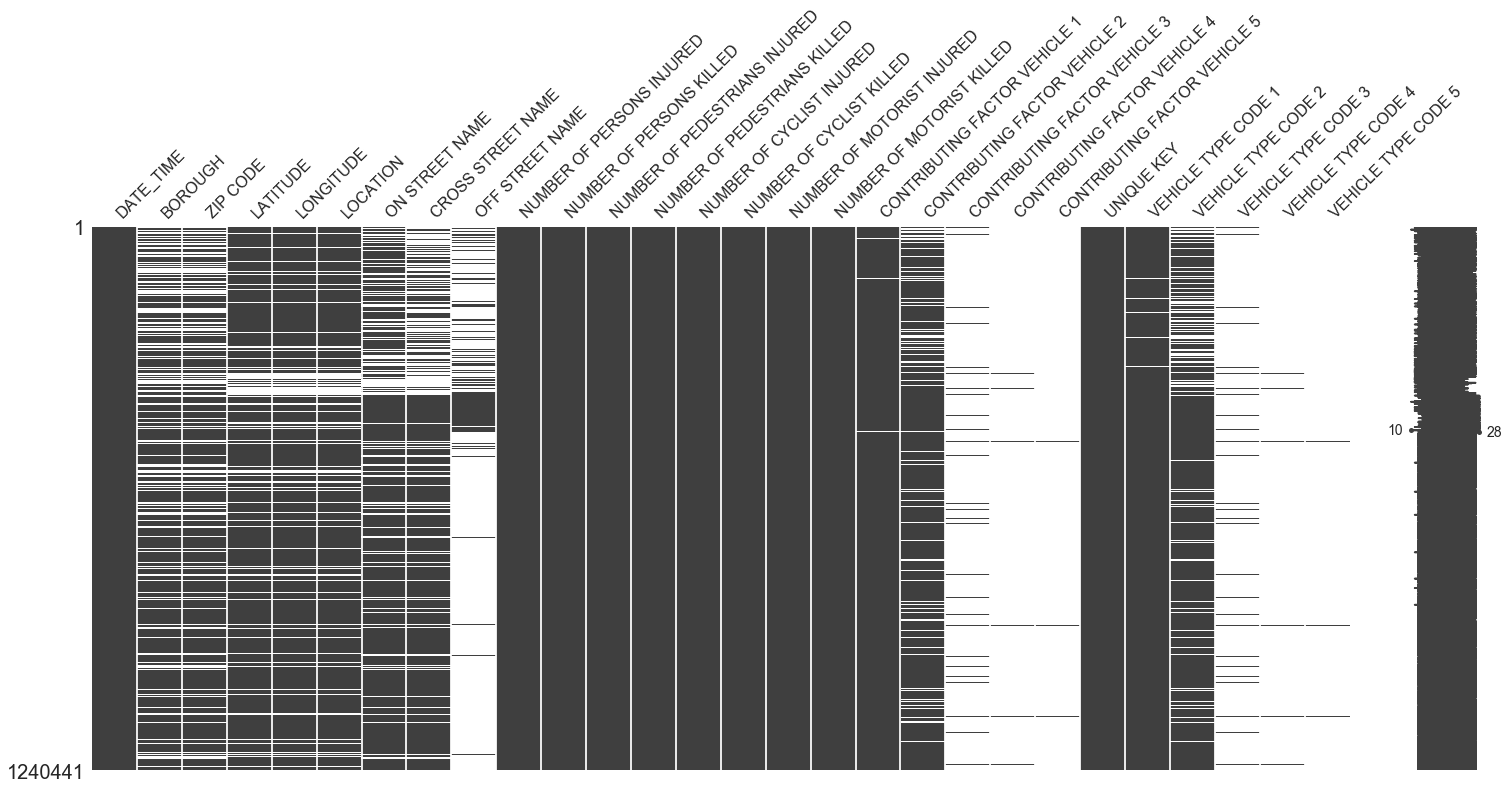

In [46]:
mn.matrix(collisions)

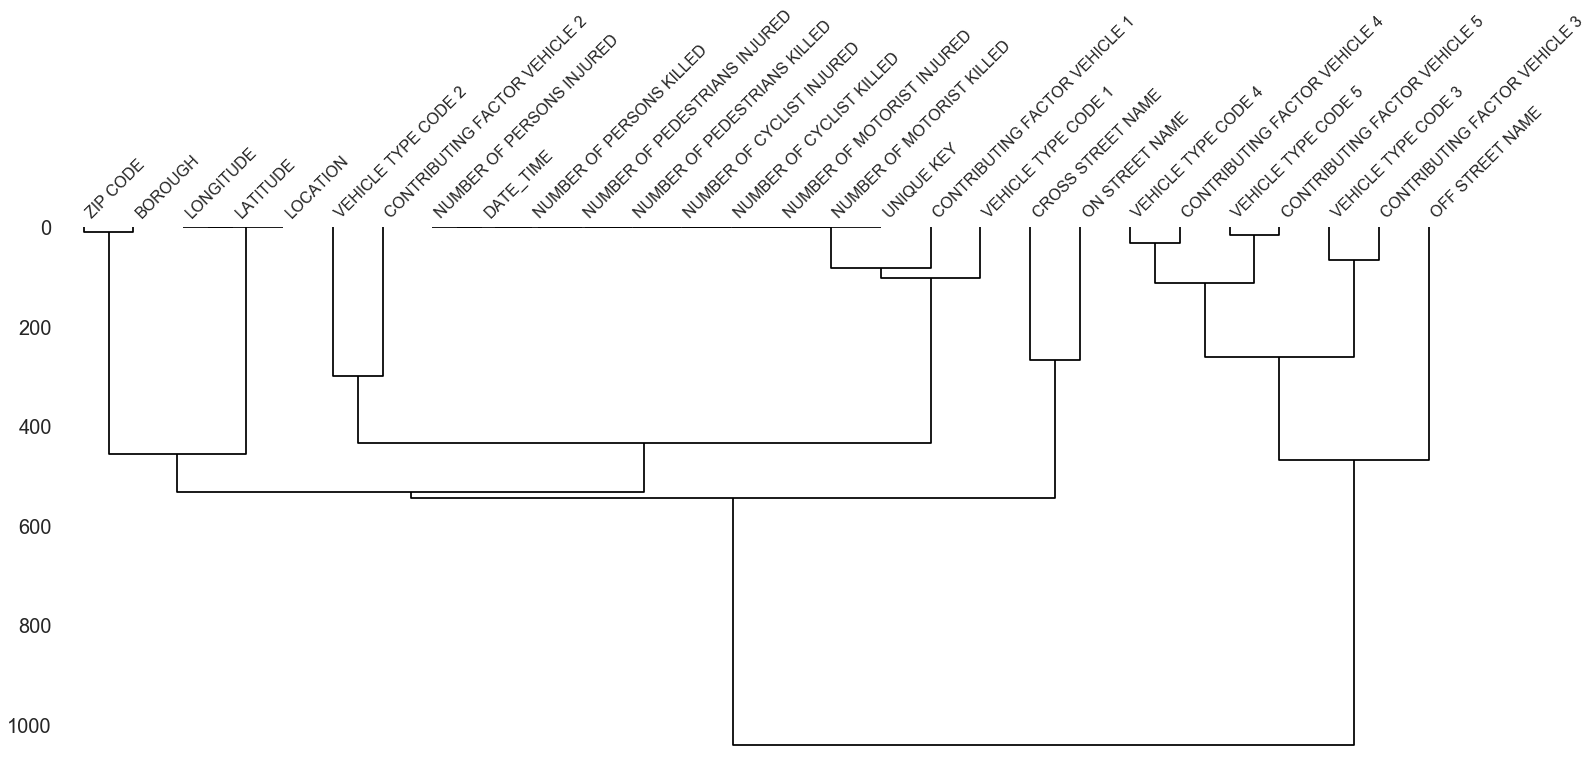

In [47]:
mn.dendrogram(collisions)

In [ ]:
mn.geoplot(collisions, x='LONGITUDE', y='LATITUDE', by='ZIP CODE')

<img src='images/geoplot.png' width="100%" align="left">

<img src='images/nyc.png' align='left' width='70%'/>

## Pandas profiling

In [49]:
import pandas_profiling

/Users/simongrest/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [50]:
pandas_profiling.ProfileReport(collisions)

Number of variables,28
Number of observations,1240441
Total Missing (%),0.0%
Total size in memory,265.0 MiB
Average record size in memory,224.0 B
Numeric,10
Categorical,15
Boolean,0
Date,1
Text (Unique),0
Rejected,1


# Summary


### Brushes
the shell offers very useful text processing tools


- ```head```
- ```tail```
- ```grep```
- ```wc```
- ```sed```
- ```...```

### Brooms
CSVKit
- ```csvcut```
- ```csvstat```
- ```csvclean```
- ```csvjoin```
- ```...```

### Mops and Buckets
- ```read_csv```
- ```describe```
- ```wide_to_long```

### Holes
- ```missingno```

----
# Thanks
 
- All of you attendees

<img src='images/blockstarters-logo.png' align='left' width="10%"/>

<img src='images/bo.jpg' align='left' width="20%"/>

-----
## Resources / References
- https://pypi.python.org/pypi/chardet
- https://www.kaggle.com/rtatman/character-encoding-examples/data
- https://youtu.be/vypm12sqoGo
- https://github.com/ResidentMario/missingno
- https://github.com/pandas-profiling/pandas-profiling